In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as pl

image_path = "./images/"
window_name = 'Image'
%matplotlib inline

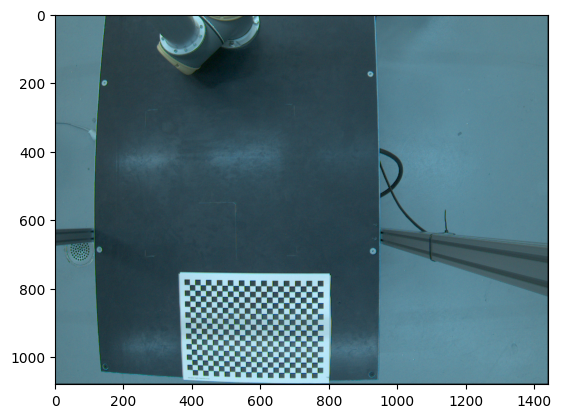

In [2]:
def show_image(mat,window_name=window_name,wait=0):
    pl.imshow(mat,cmap='gray')

img1=cv2.imread(image_path+"img1.png")

show_image(img1)


In [4]:
pattern_size=(17,24)
retval,corners=cv2.findChessboardCorners(img1,pattern_size)
print(retval)
# corners

True


gray scale pic shape (1440, 1080)


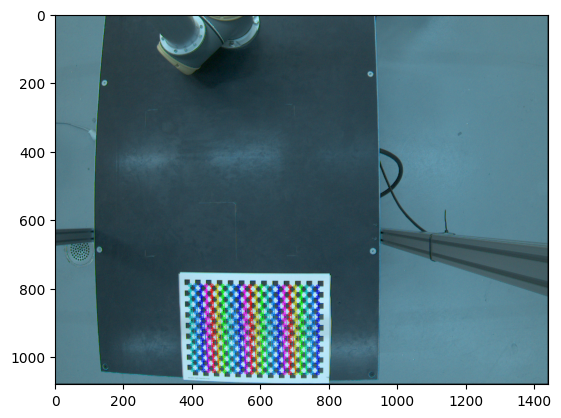

In [6]:

gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
print('gray scale pic shape',gray.shape[::-1])
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
s_corners=cv2.cornerSubPix(gray,corners,(5,5),(-1,-1),criteria)

img1_cor=cv2.drawChessboardCorners(img1,pattern_size,s_corners,retval)
show_image(img1_cor)

In [7]:

#  3D points real world coordinates(for every corner 3d dim is 0 and other 2 dims are index of the corner)
objectp3d = np.zeros((1, pattern_size[0] * pattern_size[1],
                      3), np.float32)

objectp3d[0, :, :2] = np.mgrid[0:pattern_size[0]
                    , 0:pattern_size[1]].T.reshape(-1, 2) # set X Y dimensions and the Z dimension will be 0
print(img1.shape)

retval, camera_matrix, distortion, r_vecs, t_vecs=cv2.calibrateCamera([objectp3d],[s_corners],gray.shape[::-1],None,None,)


(1080, 1440, 3)


In [8]:
# Displaying required output
print(" Camera matrix:")
print(camera_matrix)
 
print("\n Distortion coefficient: (in order of :[(k1 k2 p1 p2 k3)])")
print(distortion)
 
print("\n Rotation Vectors:")
print(r_vecs)
 
print("\n Translation Vectors:")
print(t_vecs)

 Camera matrix:
[[1.00154192e+03 0.00000000e+00 7.85617560e+02]
 [0.00000000e+00 1.01108168e+03 5.26374840e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

 Distortion coefficient: (in order of :[(k1 k2 p1 p2 k3)])
[[-0.2042814   0.1936776  -0.00101626 -0.01528933 -0.17554946]]

 Rotation Vectors:
(array([[0.00912791],
       [0.04674373],
       [1.56159387]]),)

 Translation Vectors:
(array([[-1.01583806],
       [15.98997124],
       [59.38042015]]),)


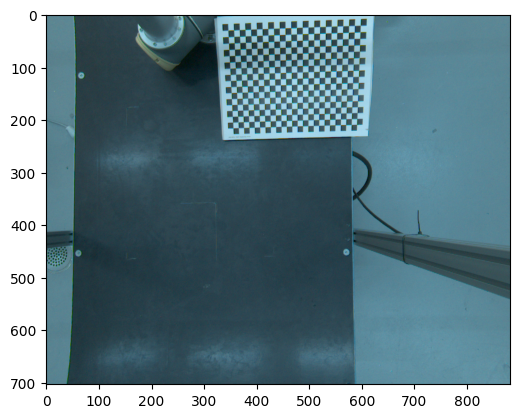

In [23]:

img5 = cv2.imread(image_path+'img5.png')
h,  w = img5.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, distortion, (w,h), 0, (w,h))

dst = cv2.undistort(img5, camera_matrix, distortion, None, newcameramtx)


show_image(dst)

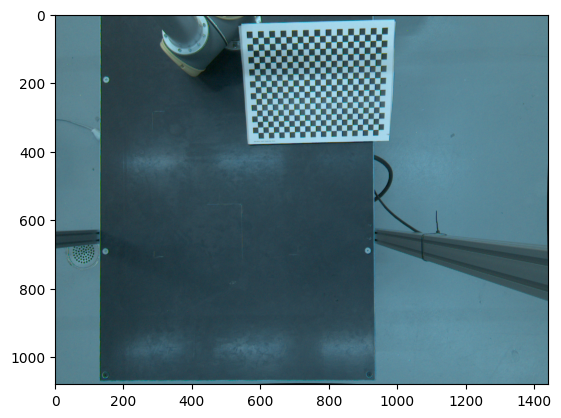

In [26]:
# part 7

img_list = ['img1.png', 'img2.png', 'img3.png','img4.png']

obj3_list=[]
corner_list=[]

for name in img_list:
    path=image_path+name
    img=cv2.imread(path)

    retval,corners=cv2.findChessboardCorners(img,pattern_size) 
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
    s_corners=cv2.cornerSubPix(gray,corners,(5,5),(-1,-1),criteria)

    corner_list.append(s_corners)
    obj3_list.append(objectp3d)


retval, camera_matrix, distortion, r_vecs, t_vecs=cv2.calibrateCamera(obj3_list,corner_list,gray.shape[::-1],None,None,)

img5 = cv2.imread(image_path+'img5.png')
h,  w = img5.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(camera_matrix, distortion, (w,h), 0, (w,h))

dst = cv2.undistort(img5, camera_matrix, distortion, None, newcameramtx)

show_image(dst)
